<a href="https://colab.research.google.com/github/keinerfan/CIAP1/blob/main/iap_morgan_fingerprint_tweaking_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ffnn morgan iap1**

Epoch:   0 Training loss: 8.01
Epoch:  10 Training loss: 1.32
Epoch:  20 Training loss: 1.12
Epoch:  30 Training loss: 1.01
Epoch:  40 Training loss: 0.88
Epoch:  50 Training loss: 0.88
Epoch:  60 Training loss: 0.87
Epoch:  70 Training loss: 0.64
Epoch:  80 Training loss: 0.74
Epoch:  90 Training loss: 0.66
Epoch: 100 Training loss: 0.61
Epoch: 110 Training loss: 0.56
Epoch: 120 Training loss: 0.47
Epoch: 130 Training loss: 0.50
Epoch: 140 Training loss: 0.43
Epoch: 150 Training loss: 0.38
Epoch: 160 Training loss: 0.37
Epoch: 170 Training loss: 0.37
Epoch: 180 Training loss: 0.37
Epoch: 190 Training loss: 0.36


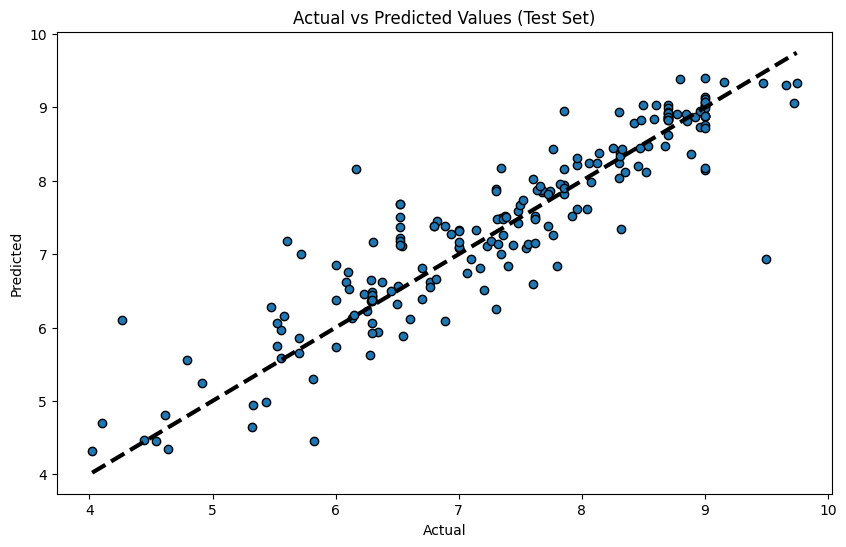

Training Set Metrics:
R-Squared: 0.9400656316528804
Adjusted R-Squared: 0.9286856882958323
Mean Squared Error (MSE): 0.10521353036165237
Mean Absolute Error (MAE): 0.23765091598033905
Mean Absolute Percentage Error (MAPE): 3.5776659846305847

Testing Set Metrics:
R-Squared: 0.8331270706601851
Adjusted R-Squared: 0.7337979460531524
Mean Squared Error (MSE): 0.26293301582336426
Mean Absolute Error (MAE): 0.35892999172210693
Mean Absolute Percentage Error (MAPE): 5.251132696866989


In [ ]:
# -*- coding: utf-8 -*-
"""multi_layer_perceptron_for_BICR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1u2-xk0FuW_rHBLNHdmKI9TqmS-T7Itfq
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/keinerfan/CIAP1/DATA-SETS/IAP1_06_morgan_fp.csv')

y = data.pIC50.values.reshape((-1,1))


data = data.drop(['pIC50'] , axis = 1 )
# Feature selection using VarianceThreshold
from sklearn.decomposition import PCA

pca = PCA(n_components=75)
pca.fit(data)
merged_data = pca.transform(data)
# Prepare X and y
x = merged_data


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(merged_data, y, test_size=0.3, random_state=42)

# Normalize y using StandardScaler

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
import torch
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)  # Added fourth layer
        #self.fc5 = nn.Linear(hidden_size, hidden_size)  #Added fifth layer
        self.fc_out = nn.Linear(hidden_size, out_size)
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)
        self.ln4 = nn.LayerNorm(hidden_size)
        #self.ln5 = nn.LayerNorm(hidden_size)  # Added layer norm for fifth layer
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc4(out)
        out = self.ln4(out)  # Apply layer normalization
        out = self.activation(out)
        out = self.dropout(out)

        #out = self.fc5(out)
        #out = self.ln5(out)  # Apply layer normalization
        #out = self.activation(out)
        #out = self.dropout(out)

        out = self.fc_out(out)
        return out

# Define hyperparameters
input_size = 75
hidden_size = 1024
dropout_rate = 0.8  # Experiment with different dropout rates
output_size = 1
learning_rate = 0.01

# Initialize model, criterion, and optimizer
model = Net(input_size, hidden_size, dropout_rate, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Example training loop (assuming train_loader and validation setup is in place)

# Training loop
model.train()
epochs = 200
for e in range(epochs):
    running_loss = 0
    for fps, labels in train_loader:
        optimizer.zero_grad()
        output = model(fps)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        if e % 10 == 0:
            print(f"Epoch: {e:3d} Training loss: {running_loss / len(train_loader):.2f}")

# Evaluation on test set
model.eval()
y_pred_test = model(X_test)

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = model(X_train)
y_test_pred = model(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')



# **saving the model**

In [ ]:
# Save the model parameters
torch.save(model.state_dict(), 'model_parameters.pth')



In [ ]:
torch.save(model, 'entire_model_ann.pth')

In [ ]:
#saving pca
import joblib

# Save the PCA model
joblib.dump(pca, 'pca_ann_75c.pkl')

['pca_ann_75c.pkl']

# **K-fold Cross validation **

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from torch.utils.data import TensorDataset, DataLoader

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/keinerfan/CIAP1/DATA-SETS/IAP1_06_morgan_fp.csv')

y = data.pIC50.values.reshape((-1,1))
scaler = StandardScaler()

data = data.drop(['pIC50'], axis=1)
pca = PCA(n_components=75)
pca.fit(data)
merged_data = pca.transform(data)

x = merged_data
y = y.reshape(-1)  # Flatten y for compatibility with sklearn

# Convert data to PyTorch tensors
device = torch.device("cpu")
x_tensor = torch.tensor(x, device=device).float()
y_tensor = torch.tensor(y, device=device).float()

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size)
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)
        self.ln4 = nn.LayerNorm(hidden_size)
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc4(out)
        out = self.ln4(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc_out(out)
        return out

# Define hyperparameters
input_size = 75
hidden_size = 1024
dropout_rate = 0.8
output_size = 1
learning_rate = 0.01
epochs = 200
n_splits = 4

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# DataFrame to store metrics
metrics_df_list = []

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(x_tensor), 1):
    X_train, X_test = x_tensor[train_index], x_tensor[test_index]
    y_train, y_test = y_tensor[train_index], y_tensor[test_index]

    # Create DataLoader for the current fold
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

    # Initialize model, criterion, and optimizer
    model = Net(input_size, hidden_size, dropout_rate, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    model.train()
    for e in range(epochs):
        running_loss = 0
        for fps, labels in train_loader:
            optimizer.zero_grad()

            # Ensure labels are of shape [batch_size, 1]
            if labels.dim() == 1:
                labels = labels.unsqueeze(1)

            output = model(fps)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    # Evaluation on test set
    model.eval()
    y_train_pred = model(X_train).detach().numpy()
    y_test_pred = model(X_test).detach().numpy()

    # Ensure y_train and y_test are of shape [batch_size, 1]
    y_train = y_train.numpy().reshape(-1, 1)
    y_test = y_test.numpy().reshape(-1, 1)

    # Calculate metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    # Calculate metrics for testing set
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # Append metrics to DataFrame list
    metrics_df_list.append({
        'Fold': fold,
        'Train R-Squared': train_r2,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Train MAPE': train_mape,
        'Test R-Squared': test_r2,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Test MAPE': test_mape
    })

    print(f"======== Fold {fold} ======")
    print("Training Set Metrics:")
    print(f'R-Squared: {train_r2}')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

    print("\nTesting Set Metrics:")
    print(f'R-Squared: {test_r2}')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')

# Convert list of dicts to DataFrame
metrics_df = pd.DataFrame(metrics_df_list)

# Save metrics to CSV
metrics_df.to_csv('k_fold_metrics.csv', index=False)


======== Fold 1 ======
Training Set Metrics:
R-Squared: 0.9078177553980527
Mean Squared Error (MSE): 0.16266179084777832
Mean Absolute Error (MAE): 0.32811224460601807
Mean Absolute Percentage Error (MAPE): 4.91088479757309

Testing Set Metrics:
R-Squared: 0.7474328846664821
Mean Squared Error (MSE): 0.3874804377555847
Mean Absolute Error (MAE): 0.45142126083374023
Mean Absolute Percentage Error (MAPE): 6.271470338106155
======== Fold 2 ======
Training Set Metrics:
R-Squared: 0.9330120933628663
Mean Squared Error (MSE): 0.11076264828443527
Mean Absolute Error (MAE): 0.24279707670211792
Mean Absolute Percentage Error (MAPE): 3.6548830568790436

Testing Set Metrics:
R-Squared: 0.7509446827656838
Mean Squared Error (MSE): 0.4727509915828705
Mean Absolute Error (MAE): 0.4528859555721283
Mean Absolute Percentage Error (MAPE): 7.4991777539253235
======== Fold 3 ======
Training Set Metrics:
R-Squared: 0.9361164109408018
Mean Squared Error (MSE): 0.10635286569595337
Mean Absolute Error (MAE): 

In [ ]:
metrics_df

,Fold,Train R-Squared,Train MSE,Train MAE,Train MAPE,Test R-Squared,Test MSE,Test MAE,Test MAPE
0,1,0.907818,0.162662,0.328112,4.910885,0.747433,0.387480,0.451421,6.271470
1,2,0.933012,0.110763,0.242797,3.654883,0.750945,0.472751,0.452886,7.499178
2,3,0.936116,0.106353,0.233125,3.589404,0.790495,0.388348,0.455985,7.240140
3,4,0.933186,0.119073,0.256347,3.985225,0.770181,0.349694,0.397876,5.941320
